<a href="https://colab.research.google.com/github/Tim3s/PL-teamproject-dataprocessing/blob/main/PL_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
user_profile_csv = pd.read_excel("drive/MyDrive/PL_team_project/user_profile.xlsx")
user_profile_csv.head()

,id,sex,age
0,228,F,80
1,230,F,73
2,232,M,84
3,273,F,83
4,276,F,56


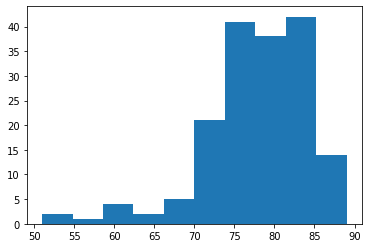

In [ ]:
plt.hist(user_profile_csv['age'])
plt.show()

In [ ]:
print(np.unique(user_profile_csv['sex'], return_counts=True))

(array(['F', 'M'], dtype=object), array([130,  40]))


In [ ]:
import datetime as dt

In [ ]:
active_input = []
active = np.array([])
state = np.array([])
target = []
valid = []
num_of_conversation = []
donotwake = []
wake_valid = []
wake_input = []
a = dt.datetime.now()
for num in user_profile_csv['id']:
    try:
        data = pd.read_csv('drive/MyDrive/PL_team_project/hs_' + str(num) + '_m08_0903_1355.csv', encoding='cp949')
    except:
        print('not found:', num)
        continue

    tmp = pd.to_datetime(data['Time'])
    if len(tmp) <= 10:
        print('not enough data:', num)
        continue
    tmp = tmp[len(tmp)-1] - tmp[0]
    if tmp < dt.timedelta(seconds=86400):
        print('not enough data:', num)

    tmp = data['Z']
    tmp = [np.sum(np.sum((tmp=='매우 활동', tmp=='외출', tmp=='프로그램'), axis=0)>0),\
            np.sum(np.sum((data=='활동', data=='냉장고', data=='밥솥', data=='싱크대', data=='창문'), axis=0)>0),\
            np.sum(np.sum((data=='미동', data=='리모콘', data=='식사 판단', data=='약', data=='전자렌지'), axis=0)>0),\
            np.sum(np.sum((data=='부동', data=='변기'), axis=0)>0)]
    # ['냉장고' '리모콘' '매우 활동' '물' '미동' '밥솥' '변기' '부동' '식사 판단' '싱크대' '약' '외출' '전자렌지'
    # '창문' '프로그램' '현관문' '화장실' '활동']
    if not sum(tmp):
        print('not enough data:', num)
        continue
    active_input.append((sum([tmp[i] * (4 - i) for i in range(4)]) / sum(tmp)))

    tmp = data['State'].to_numpy()
    if ('기상하기' not in tmp) and ('늦은 기상하기' not in tmp):
        donotwake.append(num)
    else:
        wake_valid.append(num)
        current = []
        for i in range(len(tmp)):
            if tmp[i] == '기상하기' or tmp[i] == '늦은 기상하기':
                current.append(pd.to_datetime(data['Time'][i]))

    num_of_conversation.append(len(data['STT_1'].dropna()) + len(data['STT_2'].dropna()) + len(data['STT_3'].dropna()))

    state = np.unique(np.concatenate((np.unique(data['State']), state)))
    active = np.unique(np.concatenate((active, data['Z'].dropna())))
    valid.append(num)
active_input = np.array(active_input)
state.sort()
print(state)
active.sort()
print(active)
print(valid)
print(len(donotwake), donotwake)

not enough data: 273
not enough data: 342
not enough data: 504
not enough data: 509
not enough data: 530
not enough data: 532
not enough data: 537
not enough data: 538
not enough data: 540
not enough data: 552
not enough data: 574
not enough data: 633
not enough data: 635
not enough data: 636
not enough data: 653
not enough data: 664
not enough data: 667
not enough data: 732
not enough data: 804
not enough data: 808
not enough data: 1011
not enough data: 1034
not enough data: 1039
not enough data: 1045
not enough data: 1056
not enough data: 30043
not enough data: 30044
not enough data: 30047
not enough data: 30049
not enough data: 30052
not enough data: 30059
not enough data: 30061
not enough data: 30062
not found: 30064
not found: 30066
not found: 30067
not found: 30069
not found: 30070
not found: 30071
not found: 30072
not found: 30073
not found: 30074
not found: 30075
not found: 30076
not found: 30077
not found: 30078
not found: 30079
['TV 보기' '간식 먹기' '간편식 준비하기' '귀가하기' '기상 약 복용' '기상

In [ ]:
print(len(valid))

124


In [ ]:
print(np.mean(num_of_conversation), np.std(num_of_conversation))

17.10483870967742 33.033174563583486


2.2465047201575716 0.34643958457463153 3.3333333333333335
1036


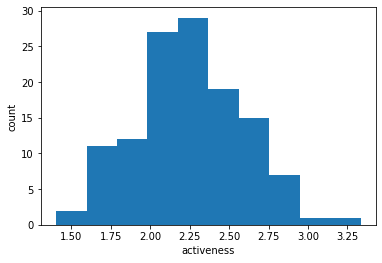

In [ ]:
print(np.mean(active_input), np.std(active_input), np.max(active_input))
print(valid[np.argmax(active_input)])
plt.hist(active_input)
plt.xlabel('activeness')
plt.ylabel('count')
plt.show()
# active_input /= np.max(active_input)

In [ ]:
state_input = np.empty(shape=(0, len(state)))
for num in valid:
    data = pd.read_csv('drive/MyDrive/PL_team_project/hs_' + str(num) + '_m08_0903_1355.csv', encoding='cp949')
    result = np.sum([state==i for i in data['State']], axis=0)
    result = result / np.sum(result)
    # print(result)
    # print(np.array([result]))
    # print(state_input)
    state_input = np.append(state_input, np.array([result]), axis=0)

In [ ]:
from sklearn.cluster import KMeans

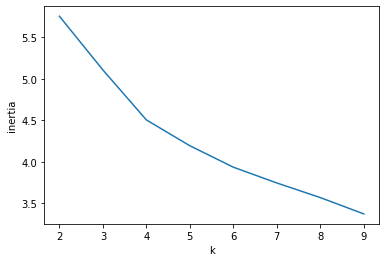

In [ ]:
inertia = []
for k in range(2, 10):
    km = KMeans(n_clusters=k)
    km.fit(state_input)
    inertia.append(km.inertia_)
plt.plot(range(2, 10), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

[  228   339   477   488   492   496   527   547   580   582   583   642
   656   661   662   668   705  1015  1027  1029  1037  1043  1047 30058]
[  230   490   494   512   518   519   534   536   581   644   672   720
   768   796   800   802   806   811   812  1003  1004  1012  1018  1021
  1026  1028  1033  1040  1042  1052  1055  1057  1059  1061  1062 30016
 30035 30038 30039 30041 30044 30046]
[  232   276   476   479   486   495   520   535   542   544   570   585
   654   655   658   797   799   801   803   805   807   809   813  1001
  1002  1008  1009  1016  1036  1046  1048  1053 30040 30045]
[  315   341   505   511   513   546   650   665   673   760  1013  1019
  1020  1022  1030  1032  1050  1054 30048 30050 30053 30055 30056 30063]
num of people in cluster: 24
mostly done activity: 취미활동


num of people in cluster: 42
mostly done activity: TV 보기


num of people in cluster: 34
mostly done activity: 음식 꺼내기


num of people in cluster: 24
mostly done activity: 외출하기




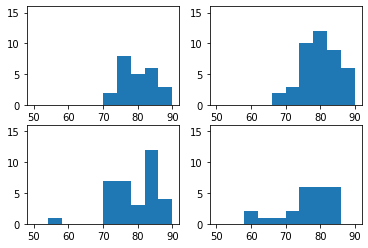

In [ ]:
km = KMeans(n_clusters=4)
km.fit(state_input)
valid = np.array(valid)
for i in range(km.n_clusters):
    print(valid[km.labels_==i])
for i in range(km.n_clusters):
    print('num of people in cluster:', np.sum(km.labels_==i))
    print('mostly done activity:', state[np.argmax(np.mean(state_input[km.labels_==i], axis=0))])
    # print(np.round(np.mean(state_input[km.labels_==i], axis=0), 3))
    # print(np.round(np.std(state_input[km.labels_==i], axis=0), 3))
    print('\n')
user_profile = user_profile_csv.to_numpy()
fig, axs = plt.subplots((km.n_clusters + 1) // 2, 2)
for i in range(km.n_clusters):
    tmp = valid[km.labels_==i]
    axs[i // 2, i % 2].hist([user_profile[j][2] for j in range(len(user_profile)) if user_profile[j][0] in tmp], range=(50, 90))
    axs[i // 2, i % 2].set_ylim([0, 16])
plt.show()